In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
initial_value = np.zeros(7)
initial_value[1:6] = 0.5
initial_value[6] = 1
true_value = np.zeros(7)
true_value[1:6] = np.arange(1, 6) / 6.0
true_value[6] = 1
left = 0
right = 1

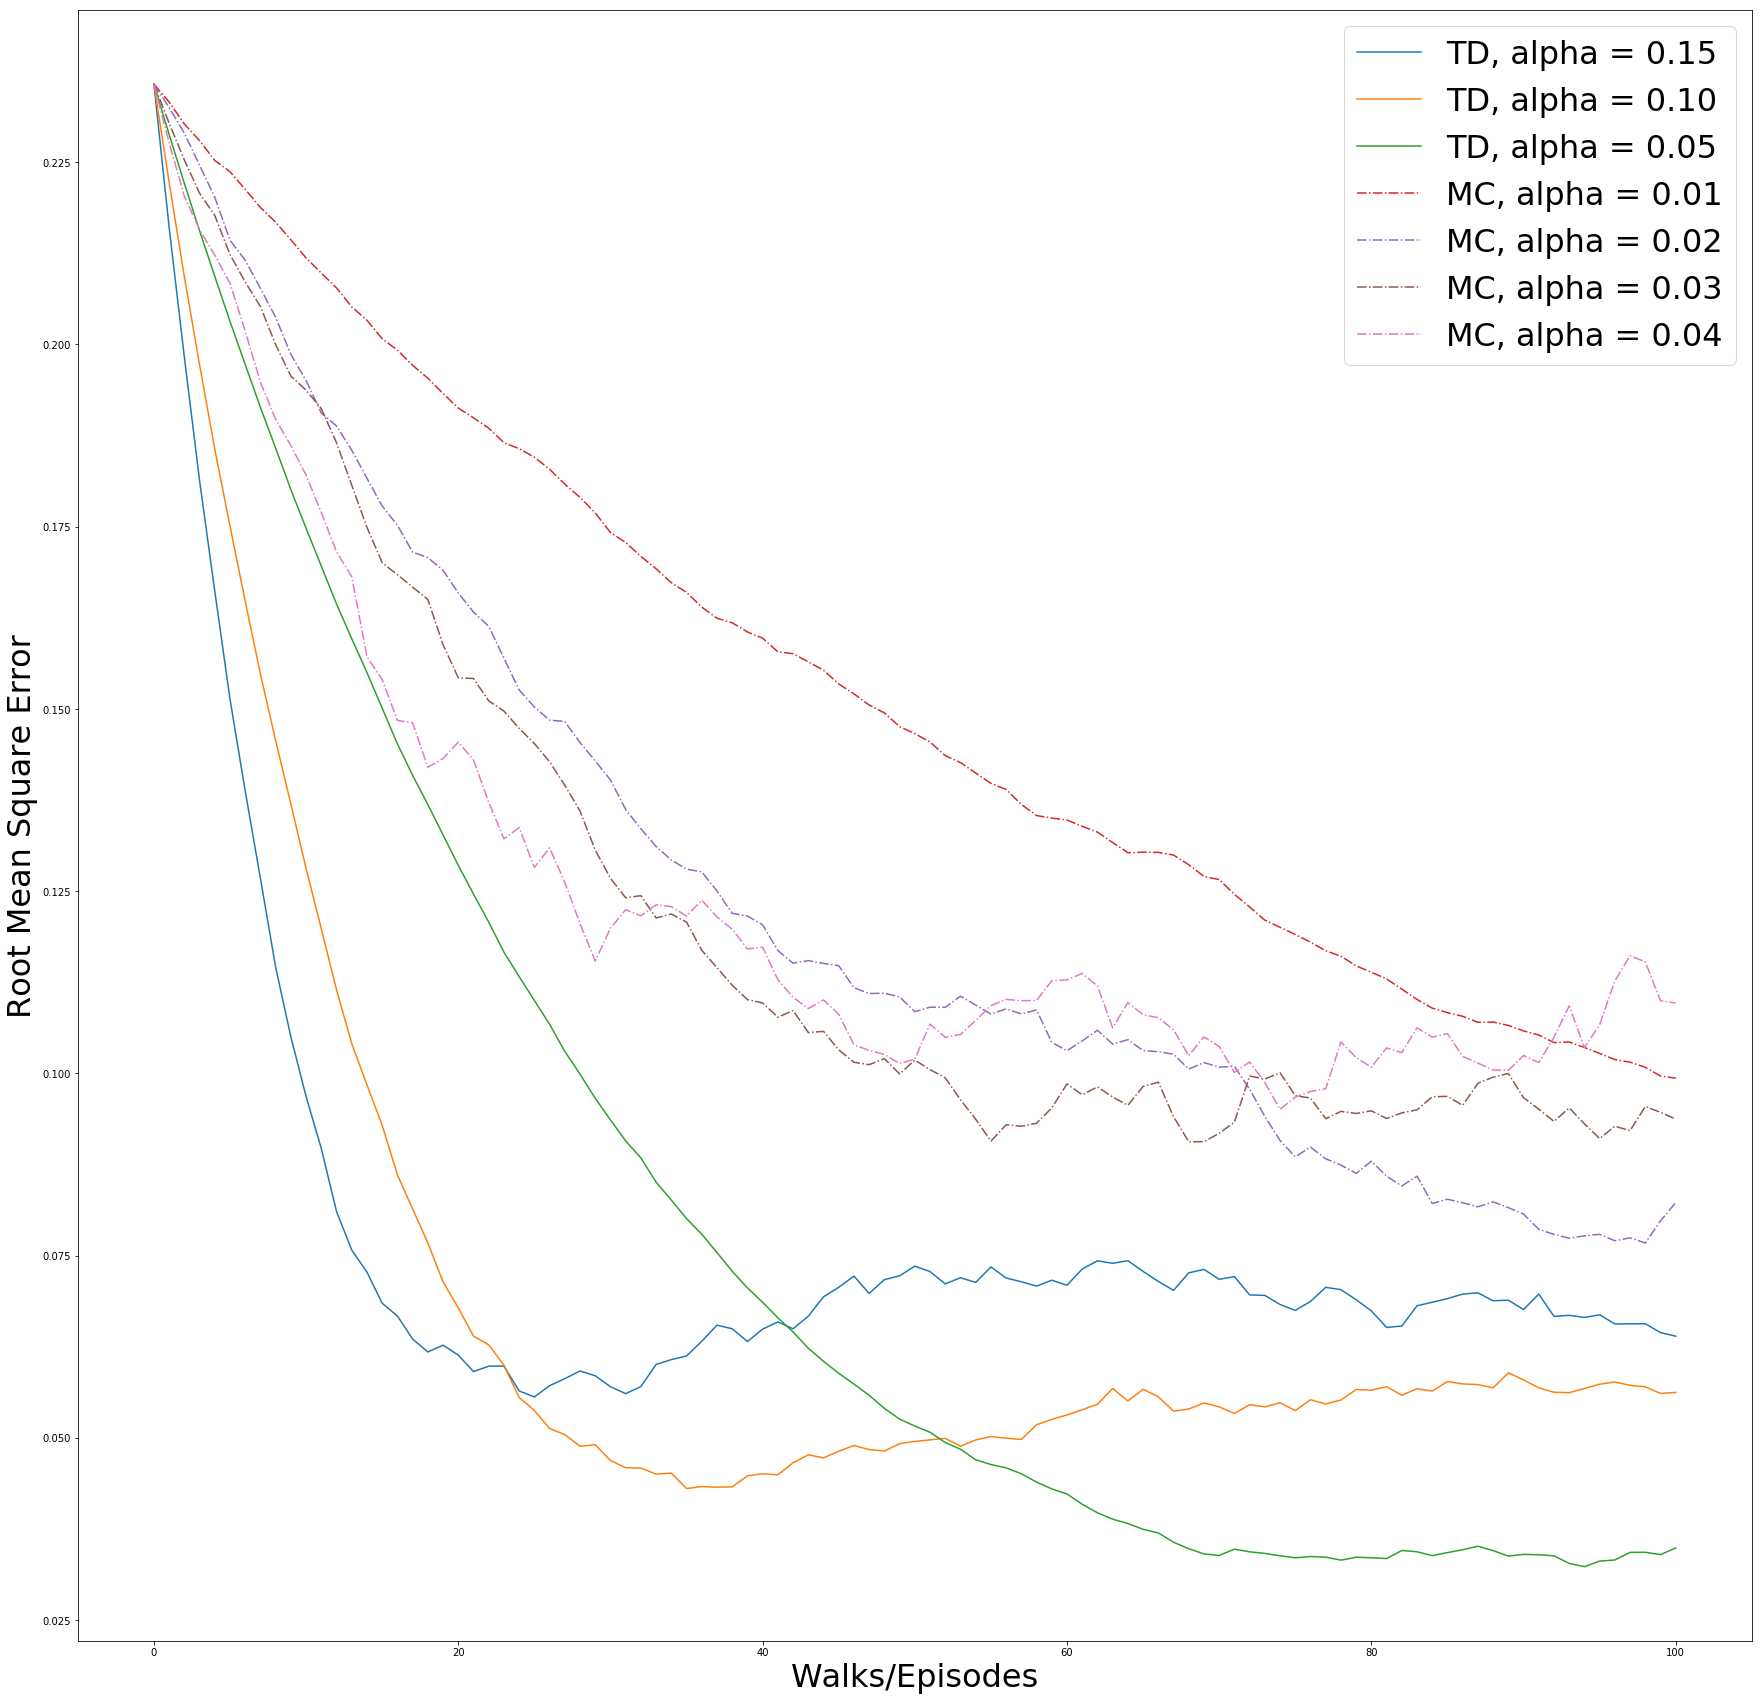

In [5]:
td_alphas = [0.15, 0.1, 0.05]
mc_alphas = [0.01, 0.02, 0.03, 0.04]
episodes = 100 + 1
runs = 100
plt.figure(figsize=(30, 30))
for i, alpha in enumerate(td_alphas + mc_alphas):
    total_errors = np.zeros(episodes)
    if i < len(td_alphas):
        method = 'TD'
        line_type = 'solid'
    else:
        method = 'MC'
        line_type = 'dashdot'
    for r in range(runs):
        errors = []
        current_values = np.copy(initial_value)
        for i in range(0, episodes):
            errors.append(np.sqrt(np.sum(np.power(true_value - current_values, 2)) / 5.0))
            if method == 'TD':
                state = 3
                alpha=alpha
                batch=False
                values = current_values
                history = [state]
                rewards = [0]
                while True:
                    old_state = state
                    if np.random.binomial(1, 0.5) == left:
                        state -= 1
                    else:
                        state += 1
               # Assume all rewards are 0
                    reward = 0
                    history.append(state)
                # TD update
                    if not batch:
                          values[old_state] += alpha * (reward + values[state] - values[old_state])
                    if state == 6 or state == 0:
                        break
                    rewards.append(reward)
            else:
                state = 3
                alpha=alpha
                batch=False
                values = current_values
                history = [3]
                while True:
                    if np.random.binomial(1, 0.5) == left:
                        state -= 1
                    else:
                        state += 1
                    history.append(state)
                    if state == 6:
                        returns = 1.0
                        break
                    elif state == 0:
                        returns = 0.0
                        break

                if not batch:
                    for state_ in history[:-1]:
            # MC update
                        values[state_] += alpha * (returns - values[state_])           
                        [returns] * (len(history) - 1)       
         
                
                
        total_errors += np.asarray(errors)
    total_errors /= runs
    plt.plot(total_errors, linestyle=line_type, label=method + ', alpha = %.02f' % (alpha))
plt.xlabel('Walks/Episodes',fontsize=32)
plt.ylabel('Root Mean Square Error',fontsize=32)
plt.legend(prop={'size': 32})
plt.savefig('Example_6_2_RMS_Error.png')
plt.show()